In [1]:
%matplotlib inline

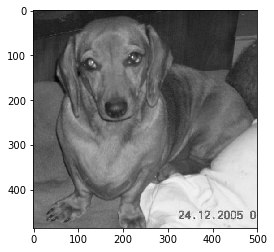

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "../dataset/kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break  

In [3]:
print(img_array.shape)


(486, 500)


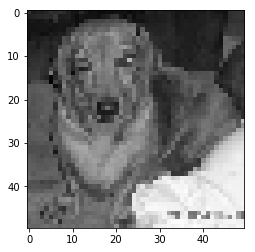

In [4]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

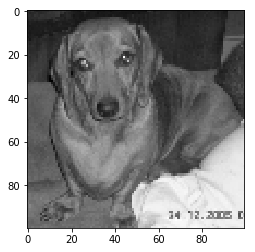

In [5]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

100%|██████████| 12501/12501 [00:07<00:00, 1703.68it/s]


In [7]:
import random
random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
1
1
0
1
0
1


In [11]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE,1))
X=np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
print(X.shape)

[[[[102]
   [138]
   [158]
   ..., 
   [138]
   [145]
   [147]]

  [[ 87]
   [135]
   [120]
   ..., 
   [100]
   [146]
   [158]]

  [[ 93]
   [153]
   [138]
   ..., 
   [163]
   [157]
   [146]]

  ..., 
  [[132]
   [137]
   [143]
   ..., 
   [214]
   [244]
   [169]]

  [[150]
   [165]
   [192]
   ..., 
   [178]
   [176]
   [178]]

  [[154]
   [161]
   [181]
   ..., 
   [202]
   [210]
   [126]]]]
(24946, 100, 100, 1)


In [14]:
import pickle
pickle_out = open("../dataset/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("../dataset/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

pickle_in = open("../dataset/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("../dataset/y.pickle","rb")
y = pickle.load(pickle_in)